## Observations and Insights 

Findings
    1. Ramicane and Capomulin had a comparable amount data points,but Ramicane came out to be the more successful treatment based on Tumor Size after treatment. Of the top 4 treatments, Infubinol was the least effective and was the only of the top 4 treatments that had an outlier in the data.
    2. Since the sex distribution is about half/half, we can conclude that the effectiveness of the treatment does not vary much based on sex.
    3. Correlation and regression of the scatter plot shows that the heavier the mouse, the less effective the treatment.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_dataset = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice = mouse_dataset["Mouse ID"].value_counts()
num_of_mice = len(mice)
num_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice = mouse_dataset.loc[mouse_dataset.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dupe_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_data = pd.DataFrame(dupe_mice)
dupe_mice_data

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_dataset[mouse_dataset['Mouse ID'].isin(dupe_mice)==False]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice = cleaned_df["Mouse ID"].value_counts()
clean_num_of_mice = len(clean_mice)
clean_num_of_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_group = cleaned_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_group['Tumor Volume (mm3)'].mean()
tumor_mean

tumor_median = summary_group['Tumor Volume (mm3)'].median()
tumor_median

tumor_variance = summary_group['Tumor Volume (mm3)'].var()
tumor_variance

tumor_stdev = summary_group['Tumor Volume (mm3)'].std()
tumor_stdev

tumor_sem = summary_group['Tumor Volume (mm3)'].sem()
tumor_sem

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": tumor_mean,
                          "Median": tumor_median,
                           "Variance": tumor_variance,
                          "Standard Dev": tumor_stdev,
                          "SEM": tumor_sem})

summary_df


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_line = cleaned_df.groupby('Drug Regimen')
single_line_summary = single_line.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
single_line_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Data Points per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Num of Data Points'>

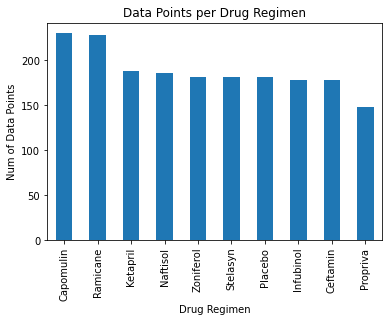

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_bar_plot = cleaned_df['Drug Regimen'].value_counts().plot(kind="bar")


#set labels
regimen_bar_plot.set_xlabel("Drug Regimen")
regimen_bar_plot.set_ylabel("Num of Data Points")
regimen_bar_plot.set_title("Data Points per Drug Regimen")

regimen_bar_plot

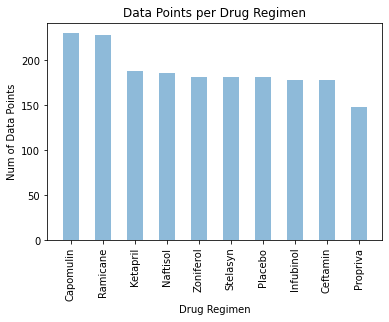

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#establish axes
regimen_counts = cleaned_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(regimen_counts))

#generate bar plot
plt.bar(x_axis, regimen_counts, alpha=0.5, width=0.5, align="center")

#tick location
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_counts.index.values)
plt.xticks(rotation=90)

#set labels
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Data Points")
plt.title("Data Points per Drug Regimen")

plt.show()

<AxesSubplot:title={'center':'Distribution by Sex'}>

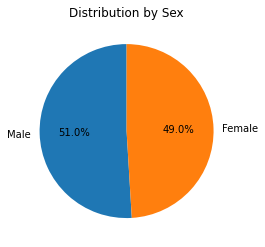

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot = cleaned_df['Sex'].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)

#set labels
pie_plot.set_ylabel("")
pie_plot.set_title("Distribution by Sex")

pie_plot

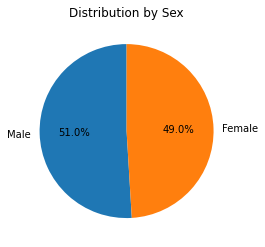

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#establish distribution
sex_counts = cleaned_df['Sex'].value_counts()

#generate pie plot
plt.pie(sex_counts, labels=sex_counts.index.values, autopct="%1.1f%%", startangle=90)

#set labels
plt.title("Distribution by Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df = pd.DataFrame({'Max Timepoint': max_timepoint})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_df, max_timepoint_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume_values = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # add subset 
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max Timepoint']]
    
    #get final volume for each regimen
    volume = final_volume_df['Tumor Volume (mm3)']
    volume_values.append(volume)
    
 # Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


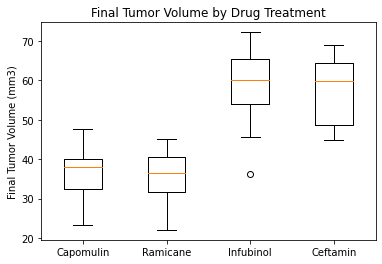

In [162]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(volume_values)

#set labels
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume by Drug Treatment")
            
plt.show()

## Line and Scatter Plots

In [87]:
#find mice treated with Capomulin
mice_group = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
mice_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


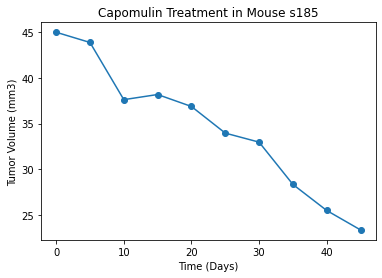

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#establish data
capomulin = cleaned_df.loc[cleaned_df['Mouse ID'] == 's185']

#generate line plot
plt.plot(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'], marker='o')

#set labels
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment in Mouse s185")
           
plt.show()

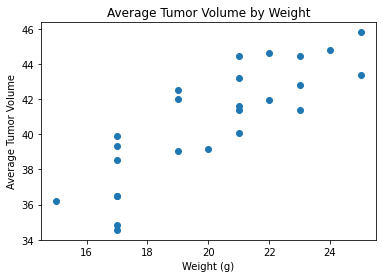

In [179]:
#find mice treated with Capomulin
mice_group = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
mice_group

#find average tumor volume
avg_tumor = pd.DataFrame(mice_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

#merge and add in mouse weight
avg_tumor_merge = pd.merge(mice_group, avg_tumor, on='Mouse ID')
final_avg_df = avg_tumor_merge[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_df

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x = final_avg_df['Weight (g)']
y = final_avg_df['avg_tumor_vol']

plt.scatter(x,y)

#set labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume by Weight")

plt.show()

## Correlation and Regression

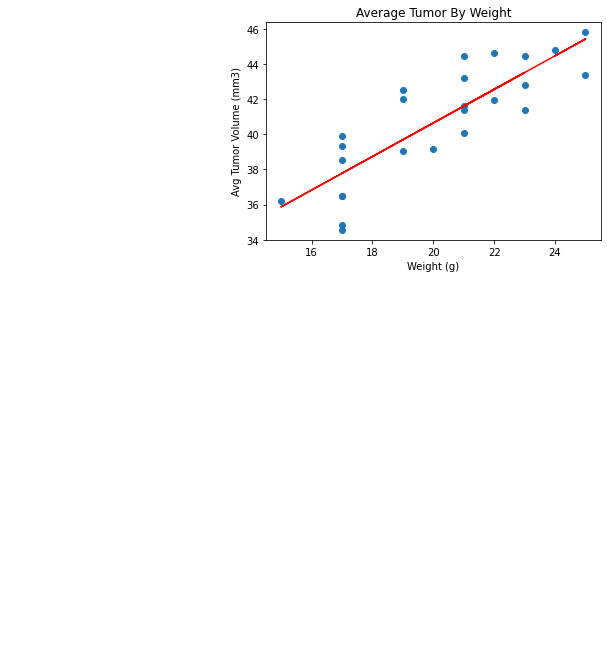

In [192]:
mice_group = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :]
mice_group
avg_tumor = pd.DataFrame(mice_group.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_tumor_merge = pd.merge(mice_group, avg_tumor, on='Mouse ID')
final_avg_df = avg_tumor_merge[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_df
x = final_avg_df['Weight (g)']
y = final_avg_df['avg_tumor_vol']

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x, y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

#set labels
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Average Tumor By Weight")

plt.show()